# Figures for thesis

## Chapter 3

### Figure of Freddie Mercury at extremes

In [75]:
from PIL import Image
from matplotlib import pyplot as plt
from glob import glob

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

def plot_pictures_with_titles(pictures, row_titles, col_titles):
    num_pictures = len(pictures)
    num_rows = num_pictures // 5 + (num_pictures % 5 > 0)
    fig, axes = plt.subplots(num_rows, 5, figsize=(15, 3*num_rows))
    
    for i, picture in enumerate(pictures):
        ax = axes[i // 5, i % 5]
        ax.imshow(picture)
        ax.axis('off')
    
    for ax, col in zip(axes[0], col_titles):
        ax.set_title(col, size=18)
        
    
    for ax, row in zip(axes[:, 0], row_titles):
        ax.axis("on")
        ax.get_yaxis().set_visible(True)
        ax.set_ylabel(row, size=18, rotation=0, labelpad=20)
        ax.get_yaxis().set_ticks([])
        ax.get_xaxis().set_ticks([])
        
    fig.tight_layout()
    fig.subplots_adjust(left=0.15, top=0.95)
    plt.show()
    
    
def import_pictures(paths):
    return [Image.open(path) for path in paths]

def change_digit(number: str, position, new_digit):
    number_str = str(number)
    if position < 0 or position >= len(number_str):
        return number
    new_number_str = number_str[:position] + str(new_digit) + number_str[position+1:]
    return int(new_number_str)


UNALIGNED_FOLDER = "/media/pawel/DATA/tmp/freddie_mercuries/en_face/unaligned/screenshots"
get_coordinates = lambda position, extreme: "55555"[:position] + str(extreme) + "55555"[position+1:]
extremes_coordinates = [get_coordinates(p, e) for e in (0, 9) for p in range(4, -1, -1)]
paths = [glob(f"{UNALIGNED_FOLDER}/*head_genes_00000{coord}.jpg")[0] for coord in extremes_coordinates]

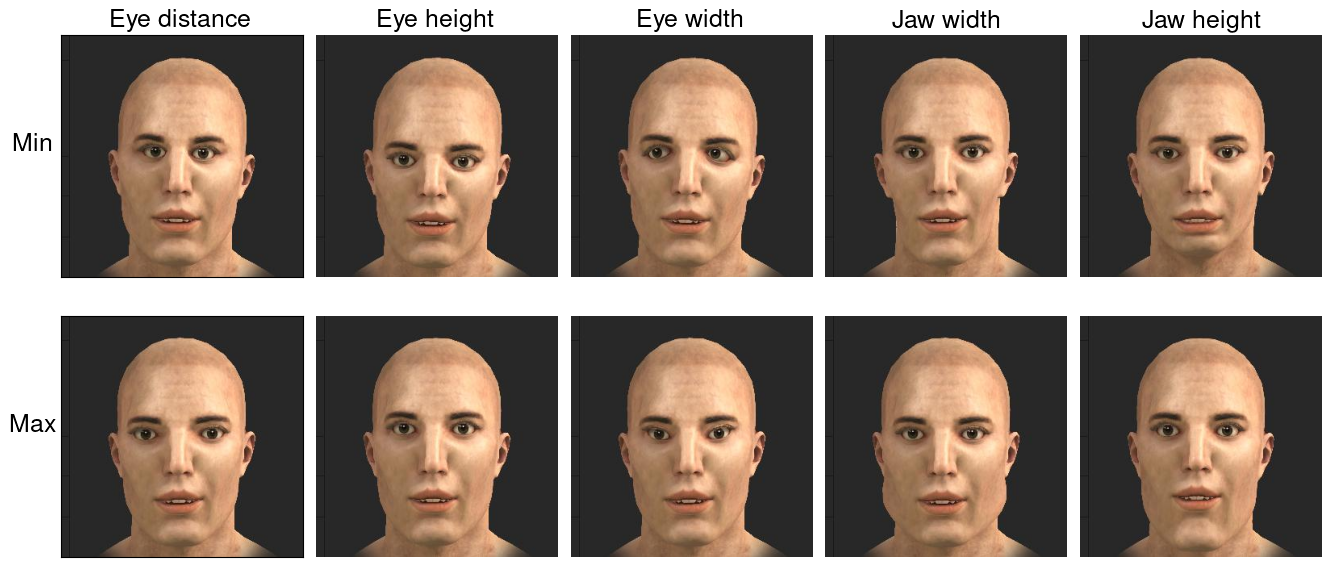

In [76]:
pictures = import_pictures(paths)
row_titles = ["Min", "Max"]
column_titles = ["Eye distance", "Eye height", "Eye angle", "Jaw width", "Jaw height"]

plot_pictures_with_titles(pictures, row_titles, column_titles)